# `Zoom` and `Pan` Interactivity

Use the `ggtb()` function to enable `Pan` and `Zoom` interactivity on a chart.

This function adds a toolbar containing three tool-buttons: pan, rubber-band zoom, and center-point zoom. 

Each tool uses **mouse-drag** for its specific functionality. Additionally, the **mouse wheel** can be used for zooming in and out, regardless of the selected tool.

The behavior of these tools adapts to the initial mouse drag direction:
- Near-horizontal drag: restricts panning to horizontal movement or creates a vertical band for zooming.
- Near-vertical drag: limits panning to vertical movement or produces a horizontal band for zooming.
- Diagonal drag: allows panning in any direction or creates a rectangular area for zooming.

**Double-clicking** anywhere on the plot resets it to its original coordinates, regardless of whether a tool is selected or not.

Click the 4th button, `Reset`, to reset the plot and tools to their original state.


In [1]:
import pandas as pd
from lets_plot import *

In [2]:
LetsPlot.setup_html()

In [3]:
mpg = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg.head(3)

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact

In [4]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/JetBrains/lets-plot/raw/master/docs/f-24g/images/shevy_impala_64.png')

image = Image.open(BytesIO(response.content))
img = np.asarray(image)
#img.shape



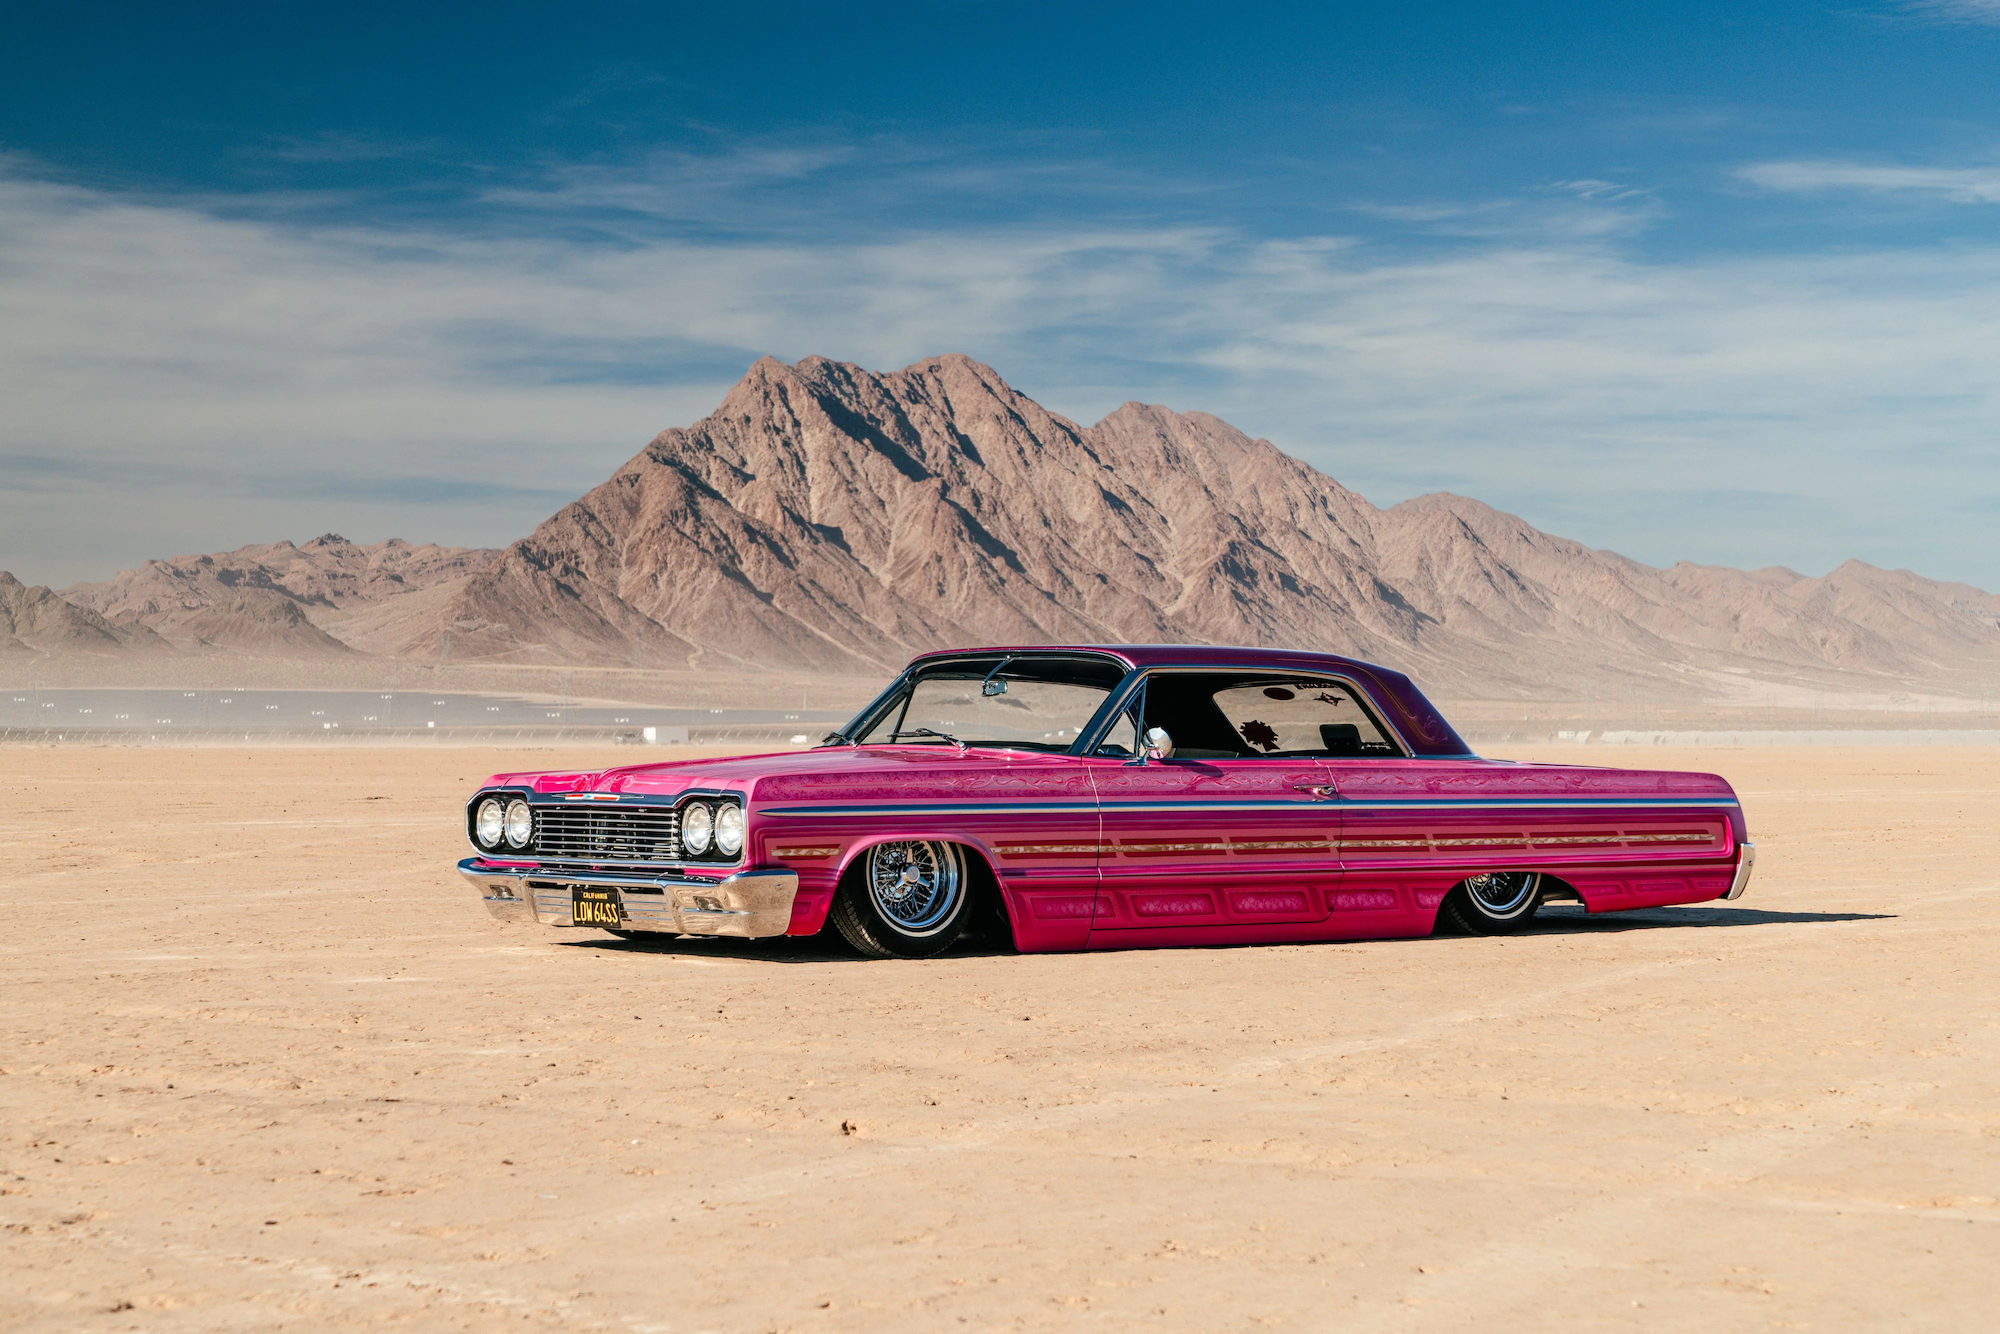

In [5]:
p = (ggplot(mpg)
     + ggtb()                        # <--- NEW!
     + theme_bw() 
     + flavor_high_contrast_dark() 
     + theme(legend_position = "none", axis_title="blank")
     + ggsize(1000, 600))

(p + aes('displ', 'hwy', color='manufacturer')
 + geom_imshow(img, extent=[5.5, 7, 35, 45])
 + geom_point(position=position_jitter(height=0, width=0.1, seed=0), 
            tooltips=layer_tooltips(['displ','cyl','trans'])
           .title('@manufacturer @model @year'))
 + geom_label(aes(label='model'), 
            check_overlap=True, 
            alpha=0.5,
            position=position_jitter(seed=0))
 + ggtitle("Highway MPG vs Engine displacement [L] ")
 + scale_color_brewer(palette="Set3") 
 + scale_continuous(aesthetic=['x', 'y'], position="both")
 + coord_cartesian()
 )
